# Revisão!


<font size=5>Até o momento nos consentramos nas análises morfológica (classe gramatical) e sintática (estrutura das frases) dos textos com o objetivo de entender a construção das frases e o papel de cada palavra nas sentenças.</font>


## Exemplos de análises morfológicas e sintáticas

In [1]:
#@title
!python -m spacy download pt

import spacy

pt = spacy.load('pt')

     |████████████████████████████████| 12.9MB 759kB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.1.0-cp36-none-any.whl size=12843677 sha256=580bded6291289209ff65d8e53b550d889b65337476e326c10ee2381d3be9d09
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9m367za/wheels/a3/8f/c1/f036e3a7f1aa44fb06a534c6c4b1c2b773f101fdb1f163c08c
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [0]:
#@title
from spacy import displacy

doc = pt('O gato perseguiu o rato')

displacy.render(doc, style='dep', jupyter=True, options={'distance':100})

In [0]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:30} {spacy.explain(token.pos_)}')

O          DET      <artd>|ART|M|S|@>N             determiner
gato       NOUN     <np-def>|N|M|S|@SUBJ>          noun
perseguiu  VERB     <mv>|V|PS|3S|IND|@FS-STA       verb
o          DET      <artd>|ART|M|S|@>N             determiner
rato       NOUN     <np-def>|N|M|S|@<ACC           noun


## Part-of-speech Tags "Super Categorias"

<font size=5>Abaixo esta uma tabela com as principais POS Tags mas, para pesquisar e entender mais sobre cada tag, uma boa forte é o site https://universaldependencies.org/treebanks/pt_gsd/index.html
</font> 
<br>

---

<br>
<table><tr><th>POS</th><th>DESCRIÇÃO</th><th>EXEMPLOS</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>
</table>


## Classificação

<font size=5>
Unindo esse conhecimento, técnicas de extração de features como vetorizadores (CounterVec e TF-IDF) e técnicas de machine learning somos capazes de classificar textos, como o exercício de classificar categorias de produtos!
<br><br>
 
Muito se fala sobre análise de sentimentos mas, a priori, não existe muita diferença\* entre o exercício de classificação de produtos e a classificação de textos entre sentimentos positivos e negativos.
<br><br>
  
\* A principal diferença a se destacar seria o uso de ironias, sarcasmo e figuras de linguagem quando trabalhamos com análise de sentimentos.
<br><br>  

</font>


<font size=5>
  **Exercício!**<br/>
 

1.   Com base no dataset disponibilizado para download, carrege 10 mil linhas de forma randômica.<br/>
2.   Crie um classificador que consiga predizer o sentimeto associado a um texto novo (não pertencente a amostra)<br/>

</font>

# Exemplo de classificador de sentimentos

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

In [0]:
import pandas as pd

df = pd.read_csv(
    'https://s3.amazonaws.com/aulas-fiap/imdb-reviews-pt-br.csv'
).sample(10000)

df.sentiment.value_counts()

neg    5042
pos    4958
Name: sentiment, dtype: int64

In [0]:
df.head()

,id,text_en,text_pt,sentiment
32276,32278,Saw it at the Philadelphia Gay and Lesbian Fil...,Vi no Festival Gay e Lésbico de Filadélfia. O ...,neg
26566,26568,"""Scary Movie 2"" is a let down to the Scary Mov...","""Scary Movie 2"" é uma decepção para a franquia...",neg
26321,26323,The first half of this movie is a pure delight...,A primeira metade deste filme é uma delícia pu...,neg
18859,18861,"Hilarious, clean, light-hearted, and quote-wor...","Hilário, limpo, despreocupado e digno de citaç...",pos
49357,49359,A serious comedy. Ross Hunter-produced movie v...,Uma comédia séria. A versão cinematográfica pr...,pos


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.text_pt)
text_vect = vect.transform(df.text_pt)

In [0]:
text_vect.shape

(10000, 66292)

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    text_vect, 
    df.sentiment,
    test_size = 0.2, 
    random_state = 13
)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=13)
tree.fit(X_train, y_train)

y_prediction = tree.predict(X_test)

acc = accuracy_score(y_prediction, y_test)

print(acc)

0.661


In [0]:
text = vect.transform([
    'Esse filme é muito legal! Mas eu não consegui assistir até o fim.'
])
tree.predict(text)[0]

'pos'

<br>

---

# Análise Semântica em NLP

<br>
<font size=5>
O próximo passo é realizar uma análise semântica dos dados, onde buscaremos entender o significado de cada palavra e como a mesma interage no texto!
</font>
</br>
 


## Word Embeddings

<br/>
<font size=5>

Word Embeddings é um modelo de rede neural para representar dados com um grande número de classes de forma mais eficiente. Os Embeddings melhoram muito a capacidade das redes neurais de aprender com dados desse tipo, representando os dados com vetores de menor dimensão.
<br/><br/>
  
Word Embeddings em particular são interessantes porque as redes são capazes de aprender relações semânticas entre as palavras. Por exemplo, os embeddings saberão que o equivalente masculino de uma rainha é um rei.

</font>

![alt text](https://d17h27t6h515a5.cloudfront.net/topher/2017/March/58c0aaf4_linear-relationships/linear-relationships.png)

<br/>
<br/>
<font size=5>
[Exemplo de visualização de um Embedding](https://projector.tensorflow.org/)
</font>
<br/><br/>



---

<font size=5>
O Word Embeddings que iremos conhecer é chamado Word2Vec pois ele cria um vetor de tamanho fixo para cada palavra!
<br/><br/>
Nosso foco não será a implementação do Word2Vec mas sim como ele funciona e sua capacidade de extrair significado das palavras, o que se torna útil para a análise semântica! Os motivos para isso são:
<br/><br/>

1.   Nossa agenda e a limitação de tempo!<br/>
2.   A possibilidade de reaproveitar uma rede treinada (transfer learning), como se faz com CNN como (VGG, RestNet, Inception etc)


<br/><br/>
Para quem se interessar em saber mais sobre Word Embeddings, abaixo estão duas ótimas referências!
<br/><br/>
  
1.   [Uma visão geral conceitual muito boa do word2vec de Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)<br/>
2.   [Primeiro artigo sobre word2vec de Mikolov et al](https://arxiv.org/pdf/1301.3781.pdf)<br/>
3.   [Video de ilustração e implementação em Tensorflow](https://www.youtube.com/watch?v=64qSgA66P-8)<br/>
4.  [Modelos de Word Embeddings treinados em pt-br](http://nilc.icmc.usp.br/embeddings)


</font>

# Como o Word2Vec funciona?

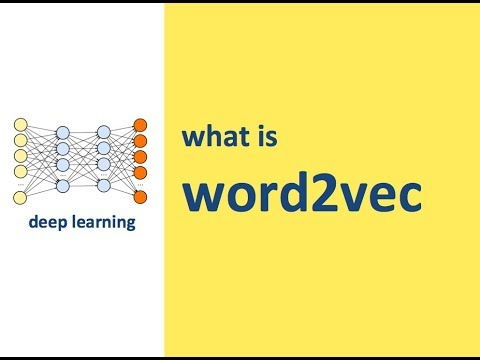

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo("64qSgA66P-8")

## CBOW e Skip-gram

<font size=5>
Dependendo do tipo de tarefa que se deseja realizar, a arquitetura da rede neural para criar o Embedding pode mudar, havendo 2 tipos principais:
</font>
<br/>
<br/>
<font size=5>
**CBOW**: A ideia do algoritmo Continuous bag of words é prever qual a palavra que estamos buscando a partir de um determinado contexto. Para isto a entrada da rede é um vetor one-hot encoded que represente as palavras do contexto e a sua saída é a palavra que estamos buscando.
</font>
<br/>
<br/>

<font size=5>
**Skip-gram**: A abordagem do Skip-gram é a inversa, tomando como ponto de partida uma determinada palavra, o objetivo é prever o contexto do qual esta palavra veio. Para isto a entrada da rede é um vetor one-hot encoded que represente a palavra que estamos buscando e a sua saída, as palavras do contexto.
</font>

![alt text](https://skymind.ai/images/wiki/word2vec_diagrams.png)

# Word2Vec com Spacy

<font size=5>
  Vamos baixar o modelo em inglês do SpaCy pois apenas nele temos o Word2Vec criado. Infelizmente o modelo em português disponível não inclui o Word2Vec.
<br/><br/>
Vamos trabalhar com um modelo em português a frente.
</font>

In [0]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


<font size=5>
A forma mais simples de explorar a similaridade de palavras atravez do Word2Vec é usando o método `.similarity`.
</font>


In [0]:
import spacy
import en_core_web_lg

en = en_core_web_lg.load()

tokens = en(u'lion cat dog')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))



lion lion 1.0
lion cat 0.5265438
lion dog 0.47424486
cat lion 0.5265438
cat cat 1.0
cat dog 0.80168545
dog lion 0.47424486
dog cat 0.80168545
dog dog 1.0


<font size=5>
Dado que cada palavra tem seu vetor de representação que leva em consideração o contexto em que a mesma esta inserida, é possível calcular o cosseno de similaridade!
</font>

![alt text](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

In [0]:

king = en.vocab['king'].vector
man = en.vocab['man'].vector
woman = en.vocab['woman'].vector

new_vector = king - man + woman

new_vector

array([ 5.14087021e-01, -2.78459996e-01,  2.42767006e-01,  4.54899669e-02,
       -2.59425014e-01, -3.19999963e-01,  3.23920012e-01, -6.71030045e-01,
       -9.98499990e-02,  1.91499996e+00, -5.68080008e-01, -2.74451017e-01,
       -1.49906695e-01,  8.01083148e-02, -2.34764010e-01, -1.10950008e-01,
       -1.02593988e-01,  8.53819966e-01, -2.68564999e-01,  3.85140002e-01,
       -1.36149988e-01,  6.35029972e-01, -7.62044966e-01, -2.52770007e-01,
       -6.75969958e-01,  3.89851004e-01, -2.89680034e-01,  1.75860003e-01,
       -5.16229987e-01,  5.21373034e-01, -1.89909995e-01,  6.73759937e-01,
        1.17550008e-01, -4.69896019e-01,  5.88999987e-01,  1.29447982e-01,
       -5.71900010e-01, -5.47450066e-01, -4.84210014e-01,  5.85503951e-02,
        4.82379973e-01, -2.86769986e-01, -2.01718003e-01, -4.74729985e-01,
        3.43068987e-01, -2.28827983e-01, -1.76439017e-01,  6.05450034e-01,
        2.07139999e-01, -2.89762974e-01, -7.63288975e-01,  4.37090009e-01,
       -2.06220001e-01, -

In [0]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = en.vocab['king'].vector
man = en.vocab['man'].vector
woman = en.vocab['woman'].vector

new_vector = king - man + woman
computed_similarities = []

for word in en.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word.text, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

computed_similarities[:10]

[('king', 0.8024259805679321),
 ('queen', 0.7880843877792358),
 ('prince', 0.6401076912879944),
 ('kings', 0.6208544373512268),
 ('princess', 0.6125636100769043),
 ('royal', 0.5800970792770386),
 ('throne', 0.5787012577056885),
 ('queens', 0.5743793845176697),
 ('monarch', 0.563362181186676),
 ('kingdom', 0.5520980954170227)]

# Word2Vec com Gensim

<br/><br/>
<font size=5>
Gensim é mais uma das libs disponíveis em Python para tarefas de NLP! Ao contrários das outras opções, essa é uma ferramenta mais especializada em tarefas de modelagem de tópicos e análise de similaridade!
<br/><br/>
Sua instalação é muito simples!
<br/><br/>

```
$ pip install gensim==2.0.0
```
</font>
<br/>


In [0]:
!pip install gensim==2.0.0

<font size=5>
O código abaixo vai baixar o modelo treinado Word2Vec com 300 posições em português e descompactar o mesmo no GDrive! Este arquivo, zipado, tem mais de 800 mega!
</font>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [0]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import zipfile

tar_gz_path = '/content/gdrive/My Drive/FIAP/NLP/cbow_s300.zip'

class DLProgress(tqdm):
  last_block = 0

  def hook(self, block_num=1, block_size=1, total_size=None):
    self.total = total_size
    self.update((block_num - self.last_block) * block_size)
    self.last_block = block_num

if not isfile(tar_gz_path):
  with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Word2Vec Model') as pbar:
    urlretrieve(
      'http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s300.zip',
      tar_gz_path,
      pbar.hook)

if not isfile('/content/gdrive/My Drive/FIAP/NLP/cbow_s300.txt'):     
  zip_ref = zipfile.ZipFile(tar_gz_path, 'r')
  zip_ref.extractall('/content/gdrive/My Drive/FIAP/NLP/')
  zip_ref.close()

<font size=5>
Com o modelo disponível, podemos carrega-lo com a ajuda da classe `KeyedVectors` do Gensim e com esse modelo podemos fazer operações de análise semântica em português!
</font>

In [0]:
!pip install scipy==1.2.0

In [0]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/FIAP/NLP/cbow_s300.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyboardInterrupt: ignored

In [0]:
model.most_similar_cosmul(positive=['mulher', 'rei'], negative=['homem'])

[('meia-irmã', 0.9702042937278748),
 ('esposa', 0.9664881229400635),
 ('rainha', 0.9587218165397644),
 ('princesa', 0.9533654451370239),
 ('sobrinha', 0.9444013833999634),
 ('filha', 0.925252377986908),
 ('irmã', 0.9192135334014893),
 ('neta', 0.9184019565582275),
 ('rainha-consorte', 0.9000979661941528),
 ('dama-de-companhia', 0.8932625651359558)]

In [0]:
model.similar_by_word("gato")

[('macaco', 0.628487229347229),
 ('cão', 0.6018786430358887),
 ('faisão', 0.5715247392654419),
 ('cachorro', 0.5658016800880432),
 ('gorila', 0.5559589266777039),
 ('pássaro', 0.5516070127487183),
 ('papagaio', 0.5474005937576294),
 ('veado', 0.5390703082084656),
 ('rato', 0.5356382131576538),
 ('leopardo', 0.5349422693252563)]

In [0]:
model.doesnt_match("cachorro gato passarinho almoço".split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:546: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'almoço'

In [0]:
model.wmdistance(
    'Barack Obama falou na ONU', 
    'Batatinha quando nasce'
)

2.0862423665753016

In [0]:
model.wmdistance('falou', 'taguarelou')

1.4045971977272034

In [0]:
model.wmdistance('Batatinha quando nasce', 'Pirulito que bate bate')

2.035354679146827

# Exercícios!

1.   Crie uma função que substitua uma ou mais palavras de um texto um uma palavra similar com base na sua classe gramatical.
2.   Extenda essa função para considerar uma substituição positiva ou negativa.
3.   Dadas duas palavras, encontre opções mais parecidas com a primeira palavra do que a segunda palavra. Ex: "gato" e "cachorro" como entradas e esperamos saídas como "cachorro", "cão", etc.

# Soluções

In [0]:
!python -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [0]:
import spacy

pt = spacy.load('pt')

def trocar_por_similar(frase, pos, sentido):
  doc = pt(frase)
  
  nova_frase = []
  for token in doc:
    if token.pos_ == pos:
      similares = model.most_similar_cosmul(positive=[token.text, sentido])
      for similar, _ in similares:
        if similar != token.text:
          break
      nova_frase.append(similar)
    else:
      nova_frase.append(token.text)
  return ' '.join(nova_frase)
  
  

In [0]:
pt('Você era muito bonito')[3].pos_

In [0]:
print(trocar_por_similar('Você é muito baixo', 'ADJ', 'ótimo'))

Você é muito fraco


In [0]:
model.closer_than('gato', 'homem')[:5]